In [2]:
from medmnist import OCTMNIST
import numpy as np
from collections import Counter, defaultdict
from PIL import Image
import matplotlib.pyplot as plt

# OCT (Optical Coherence Tomography)  
OCT is a non-invasive imaging diagnostic technique that enables the acquisition of cross-sectional images of internal tissue structures with very high resolution—on the order of a few micrometers.

OCT operates on the principle of **low-coherence interferometry**, similar to ultrasonography, but instead of sound waves, it utilizes **infrared light** (e.g., from a superluminescent diode LED), typically with a wavelength in the range of 800–1300 nm.

This light is directed onto the examined tissue, where it is partially **reflected from various tissue layers**. The time delay of these reflected signals enables the reconstruction of a cross-sectional image of the tissue.

The images generated by OCT are cross-sectional views of tissues (so-called **B-scans**), in which each vertical line corresponds to a single depth measurement (known as an A-scan). By acquiring multiple A-scans, a two-dimensional representation of tissue structure can be created.

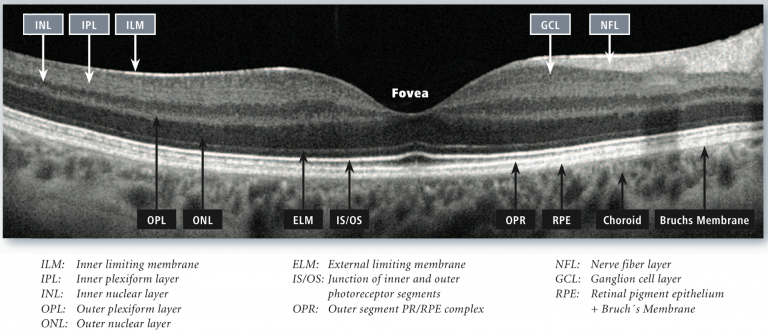

In [3]:
im = Image.open('desc_oct.png')
display(im)

Image source: https://eyeguru.org/essentials/interpreting-octs/

| Short        | Full name                                      |
|--------------|------------------------------------------------|
| **ILM**      | Inner limiting membrane                        |
| **IPL**      | Inner plexiform layer                          |
| **INL**      | Inner nuclear layer                            |
| **OPL**      | Outer plexiform layer                          |
| **ONL**      | Outer nuclear layer                            |
| **ELM**      | External limiting membrane                     |
| **IS/OS**    | Junction of inner and outer photoreceptor segments |
| **OPR**      | Outer segment PR/RPE complex                   |
| **RPE**      | Retinal pigment epithelium                     |
| **Choroid**  | Choroid                                        |
| **Bruch's Membrane** | Bruch’s Membrane                  |
| **NFL**      | Nerve fiber layer                              |
| **GCL**      | Ganglion cell layer                            |


## 1. CNV – Choroidal Neovascularization

### Clinical Description
CNV refers to the pathological ingrowth of blood vessels from the choroid through Bruch’s membrane into the subretinal or sub-RPE space. It is a hallmark of the exudative (neovascular) form of age-related macular degeneration (AMD).

### OCT Image Characteristics
- Hyperreflective mass beneath the retinal pigment epithelium (RPE),
- Presence of subretinal or intraretinal fluid (hyporeflective spaces),
- RPE elevation (pigment epithelial detachment – PED),
- Hyporeflective space between the RPE and Bruch’s membrane,
- Possible hemorrhages and fibrosis, appearing as irregular, hyperreflective zones.

## 2. DME – Diabetic Macular Edema

### Clinical Description
DME results from microangiopathy in the course of diabetes and is characterized by increased permeability of retinal capillaries, leading to fluid accumulation within the retina, particularly in the macular area.

### OCT Image Characteristics
- Cystoid spaces with low reflectivity within the retinal layers,
- Increased retinal thickness in the macular center (>250 µm),
- Blurred boundaries between retinal layers,
- Intraretinal hyporeflective spaces,
- Possible presence of hyperreflective foci (hard exudates) in the outer layers.

## 3. DRUSEN – Subretinal Deposits (Dry AMD)

### Clinical Description
Drusen are sub-RPE deposits composed of lipids and proteins, located between Bruch’s membrane and the RPE. They are the primary marker of early-stage dry age-related macular degeneration (AMD).

### OCT Image Characteristics
- Irregular, focal or punctate RPE elevations,
- Relatively high reflectivity at the location of drusen,
- Preserved architecture of retinal layers above the drusen (in early stages),
- Absence of intraretinal and subretinal fluid,
- Possible retinal atrophy in advanced stages.

## 4. NORMAL – Normal Retinal Images

### Clinical Description
This class contains images of a healthy retina, without pathological features such as fluid accumulation, cysts, RPE detachment, or disturbances in layer architecture.

### OCT Image Characteristics
- Clear, continuous segmentation of all retinal layers (RNFL, GCL, IPL, INL, OPL, ONL, ELM, EZ, RPE),
- No elevations, thickenings, or focal abnormalities,
- No intraretinal or subretinal fluid present,
- Uniform reflectivity in both inner and outer retinal layers.

# --------------------------------------

## Images from the dataset

In [4]:
test_dataset = OCTMNIST(split="test", download=True, size=224)

label_names = {
    0: "choroidal neovascularization",
    1: "diabetic macular edema",
    2: "drusen",
    3: "normal",
}

Using downloaded and verified file: C:\Users\Eve\.medmnist\octmnist_224.npz


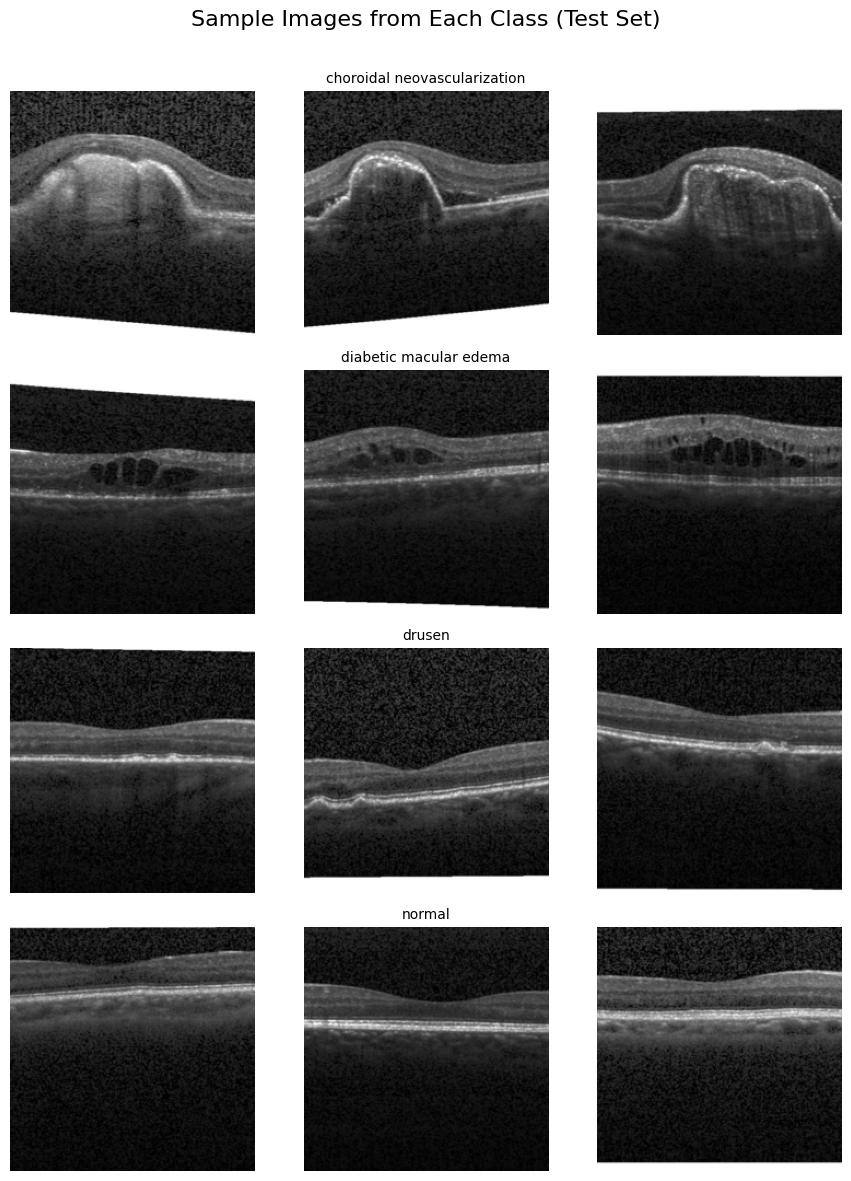

In [5]:
images = test_dataset.imgs
labels = test_dataset.labels.squeeze()

# Zbierz po 3 indeksy z każdej klasy
class_indices = defaultdict(list)
for idx, label in enumerate(labels):
    if len(class_indices[label]) < 3:
        class_indices[label].append(idx)

# Inicjalizacja siatki wykresu
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9, 12))
fig.suptitle("Sample Images from Each Class (Test Set)", fontsize=16)

# Rysowanie obrazów z użyciem PIL
for row, (class_id, indices) in enumerate(sorted(class_indices.items())):
    for col, idx in enumerate(indices):
        ax = axs[row, col]
        image_array = images[idx].squeeze()  # shape: (H, W)
        image = Image.fromarray(image_array.astype(np.uint8))  # konwersja do obrazu PIL
        ax.imshow(image, cmap="gray")
        ax.axis("off")
        if col == 1:
            ax.set_title(label_names[class_id], fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()